# Статистика, DS-поток
## Практическое задание 7. Проверка гипотез

In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from warnings import filterwarnings

filterwarnings(action='ignore', category=FutureWarning)

%matplotlib inline

In [6]:
alpha = 0.05

_____
## Задача 1.

Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

> *Примечание.* На самом деле здесь проверяются немного другие гипотезы, не те, о которых шла речь в первом абзаце. Подумай, в чем же отличие, и *как стоило бы делать*. Если придумаешь, напиши личным сообщением Никите с полным и подробным пояснением. Первые 5 человек, кто напишет правильный и полный ответ, получат призы.

На семинаре получено, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. 
Чему при этом равно $c_\alpha$?

$c_\alpha = 1-\alpha-квантиль Bin(n, 1/2)$ 

Проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$, а также выведите результат процедуры проверки гипотез 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`.

*Заказчиков часто интересует p-value, добавлю его в результаты проверки гипотез*

In [1]:
def is_rejected(stat, c_alpha):
    return stat >= c_alpha

In [111]:
n_s = [1, 5, 10, 100, 500, 10**3, 10**4, 10**5, 10**6]
data = []

for n in n_s:
    X = sps.bernoulli(p=0.5).rvs(size=n)
    T = X.sum()
    c_alpha = sps.binom(n=n, p=0.5).ppf(1 - alpha)
    is_rej = 1 if is_rejected(T, c_alpha) else 0
    p_value = sps.binom(n, 0.5).sf(T)
    data.append([c_alpha, is_rej, p_value])
    
hyp_df = pd.DataFrame(data, columns=['$c_{\\alpha}$', 'Результат проверки', 'p-value'], index=n_s)
hyp_df

,$c_{\alpha}$,Результат проверки,p-value
1,1.0,1,0.000000
5,4.0,1,0.031250
10,8.0,0,0.171875
100,58.0,0,0.815899
500,268.0,0,0.223565
1000,526.0,0,0.991169
10000,5082.0,0,0.614091
100000,50260.0,0,0.425997
1000000,500822.0,0,0.212726


*Чисто по размеру выборки сложно сказать, есть ли зависимость результата гипотезы от размера выборки. Плюс это только 1 эксперимент в каждом случае, результат всегда различный. Попробуем проверить закономерность другим экспериментом. Возьмём p, сильно большее истинного, и проверим гипотезу на выборке малого и большого размера, несколько раз.*

In [148]:
def experiment(n):
    data = []
    for _ in range(10):
        X = sps.bernoulli(p=0.85).rvs(size=n)
        T = X.sum()
        c_alpha = sps.binom(n=n, p=0.5).ppf(1 - alpha)
        is_rej = 1 if is_rejected(T, c_alpha) else 0
        p_value = sps.binom(n, 0.5).sf(T)
        data.append([c_alpha, is_rej, p_value])

    return pd.DataFrame(data, columns=['$c_{\\alpha}$', 'Результат проверки', 'p-value'])

In [150]:
experiment(5)

,$c_{\alpha}$,Результат проверки,p-value
0,4.0,1,0.03125
1,4.0,0,0.18750
2,4.0,0,0.50000
3,4.0,1,0.00000
4,4.0,1,0.00000
5,4.0,0,0.50000
6,4.0,0,0.18750
7,4.0,1,0.00000
8,4.0,1,0.03125
9,4.0,1,0.00000


In [152]:
experiment(10**6)

,$c_{\alpha}$,Результат проверки,p-value
0,500822.0,1,0.0
1,500822.0,1,0.0
2,500822.0,1,0.0
3,500822.0,1,0.0
4,500822.0,1,0.0
5,500822.0,1,0.0
6,500822.0,1,0.0
7,500822.0,1,0.0
8,500822.0,1,0.0
9,500822.0,1,0.0


*Видим, что при малой выборке даже при большом отличии p от истинного, H0 не всегда она отвергается, хотя должна. А вот при большой выборке отвергается всегда. Значит большие выборки надежнее. Остается понять, какой должен быть порог размера выборки*

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.

*Также зафиксируем предыдущее значение p=0.85 как порог, при котором точно должна отвергаться H0 (на практике), то есть то что точно есть закономерность между котом и неудачами. То же самое с мощностью - возьмем пороговое значение 0.8 (с лекции). Оптимальным будет такое n, при котором мощность=0.8 при p=0.85*

*Так как при больших выборках всё и так всё отвергается, будем искать в среднем интервале размера: 10-100*

In [18]:
def criterion_power(n, p, c_alpha):
    return sps.binom(n=n, p=p).sf(c_alpha)

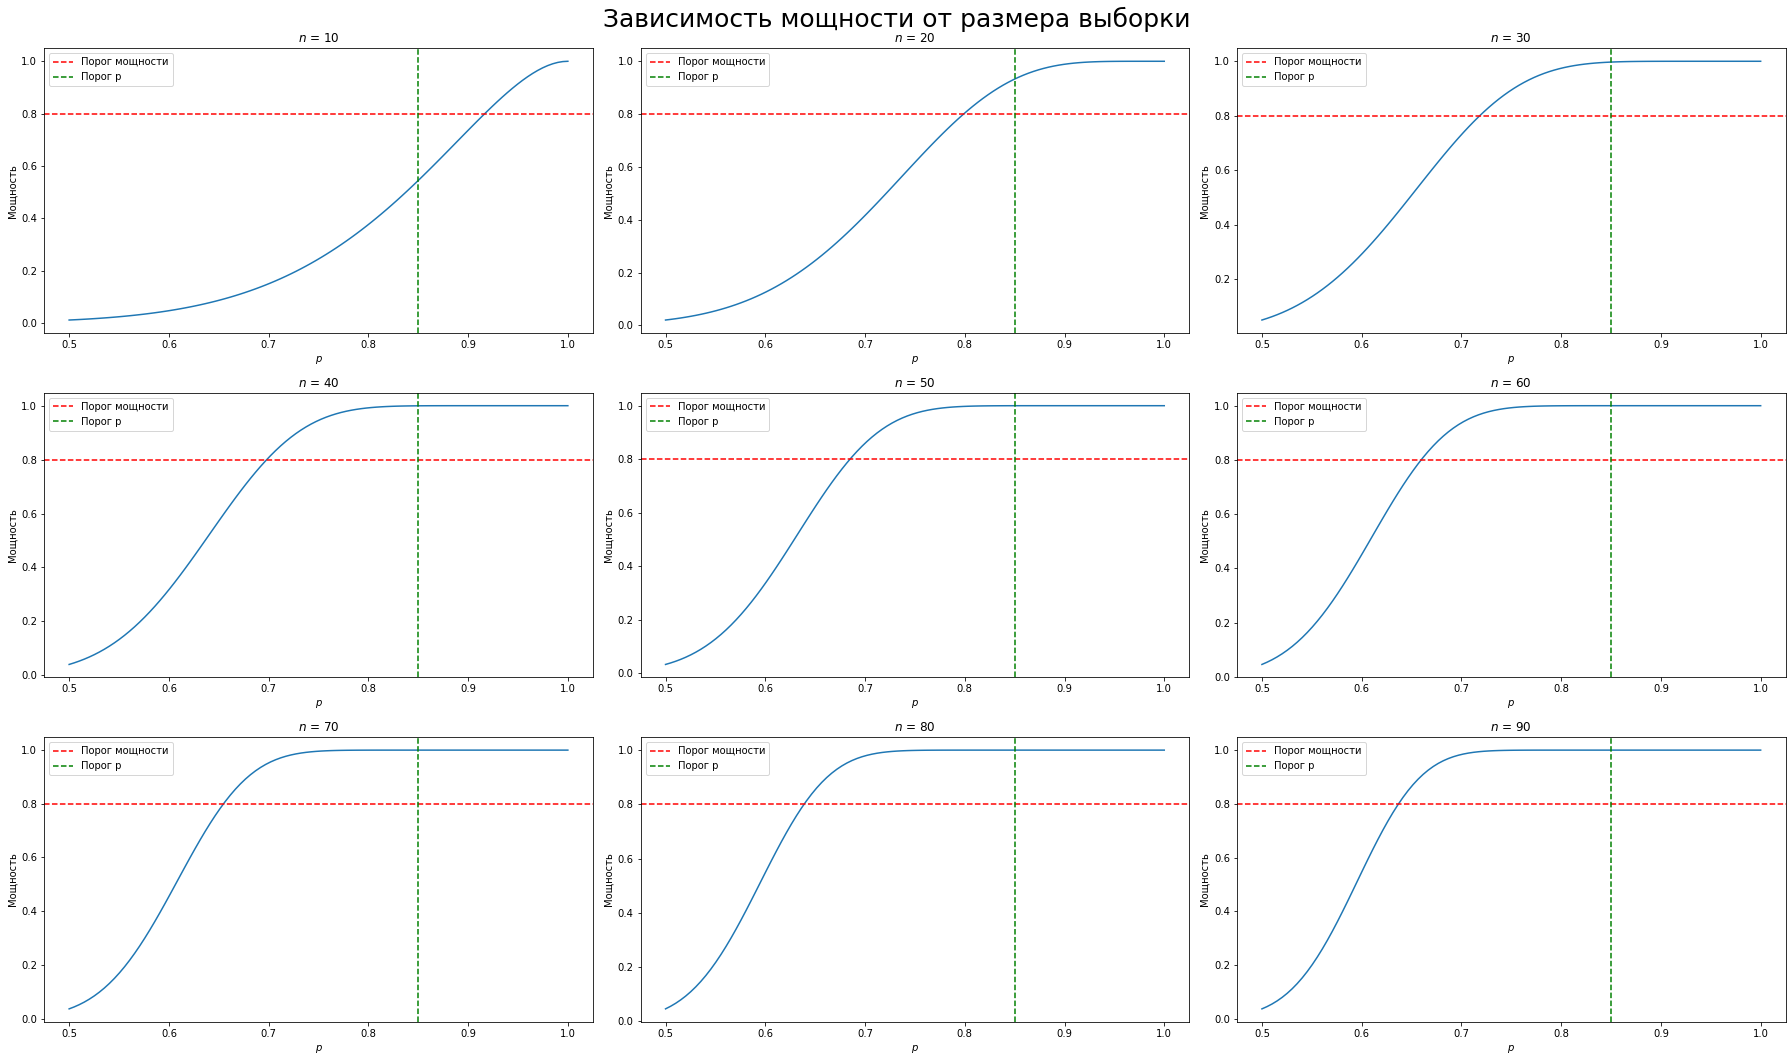

In [164]:
power_threshold = 0.8
p_threshold = 0.85
p_grid = np.linspace(0.5, 1, 100)
n_grid = np.arange(10, 100, 10)
plt.figure(figsize=(25, 15))

for i, n in enumerate(n_grid):
    plt.subplot(3, 3, i + 1)
    plt.title('$n$ = {}'.format(n))
    plt.xlabel('$p$')
    plt.ylabel('Мощность')
    plt.plot(p_grid, criterion_power(n, p_grid, sps.binom(n=n, p=0.5).ppf(1 - alpha)))
    plt.axhline(power_threshold, ls='--', c='r', label='Порог мощности')
    plt.axvline(p_threshold, ls='--', c='g', label='Порог p')
    plt.legend()

plt.suptitle('Зависимость мощности от размера выборки', fontsize=25)
plt.tight_layout();

*В данном случае оптимальным будет n=20*

**Вывод:** *При малых значениях при других фиксированных параметрах выборки мощность меньше, а при больших - больше, поэтому важно искать оптимальный размер выборки при котором гипотезы будут верно отвергаться. Но стоит также отметить, что у очень большого размера выборки есть недочет - нулевые гипотезы будут отвергаться почти всегда, даже если параметр распределения очень близко к нулевому параметру.*

_____
## Задача 2.

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.

Для каждого повторения:
- 1. Генерим выборку размера n распределения нулевой гипотезы P0
- 2. Считаем статистику Вальда W(x) данной выборки - это будут i.i.d СВ
- 3. Запоминаем решение об отвержении гипотезы

Вычисляем среднее решение. Это и будет эмпирическая ошибка 1 рода. Проверяем, что она <= $\alpha$ - установленного уровня значимости (0.05)

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

Для каждого $\mathsf{P} \in \mathscr{P}_0$:

    Для каждого повторения:
        - 1. Генерим выборку размера n распределения нулевой гипотезы P
        - 2. Считаем статистику Вальда W(x) данной выборки - это будут i.i.d СВ
        - 3. Запоминаем решение об отвержении гипотезы

Вычисляем среднее решение. Это и будет эмпирическая ошибка 1 рода. Проверяем, что она <= $\alpha$ - установленного уровня значимости (0.05)

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

*Будем каждый раз генерить 10^5 выборок данного размера*

*Для Пуассона $\overline{X}$- АНО, $\sqrt{\overline{X}}$ - состоятельная оценка ассимптотической дисперсии $\sigma^2 = \theta$*

In [ ]:
n_range = np.arange(1, 51, 1)
theta_0 = 1
hyp_decisions = []

for n in n_range:
    X = sps.poisson(mu=theta_0).rvs(size=(10**5, n))
    mean = X.mean(axis=1)
    W = np.sqrt(n)*np.abs(mean - theta_0)/np.sqrt(mean)
    c_alpha = sps.norm().ppf(1 - alpha/2)
    is_rej = is_rejected(W, c_alpha)
    hyp_decisions.append(is_rej)

hyp_decisions_mean = np.array(hyp_decisions).mean(axis=1)

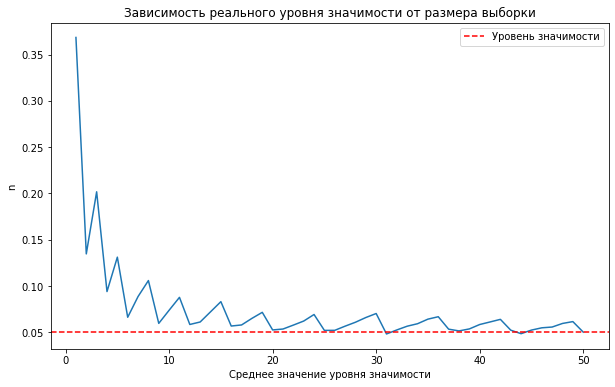

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(n_range, hyp_decisions_mean)
plt.axhline(alpha, ls='--', c='r', label='Уровень значимости')
plt.legend()
plt.xlabel('Среднее значение уровня значимости')
plt.ylabel('n')
plt.title('Зависимость реального уровня значимости от размера выборки');

**Вывод:** *Ожидаемо, при увеличении выборки реальный уровень значимости приближается к теоретическому.*

**2.** Для значений $n \in \{5, 15, 50\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.01 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [213]:
def linspace(start, stop, step=0.01):
    return np.linspace(start, stop, int((stop - start) / step + 1), endpoint=False)

In [255]:
n_s = [5, 15, 10]
theta_grid = linspace(0, 5)

powers_monte_carl = [[], [], []]
powers_asympt = [[], [], []]
hyp_decisions = [[], [], []]

for i, n in enumerate(n_s):
    for theta in theta_grid:
        X = sps.poisson(mu=theta_0).rvs(size=(100, n))
        mean = X.mean(axis=1)
        W = np.sqrt(n)*np.abs(mean - theta)/np.sqrt(mean)
        c_alpha = sps.norm().ppf(1 - alpha/2)
        is_rej = is_rejected(W, c_alpha)
        hyp_decisions[i].append(is_rej)


        powers_monte_carl[i].append(sps.norm().sf(c_alpha))
        powers_asympt[i].append(sps.norm.sf(c_alpha - W) + sps.norm.cdf(c_alpha - W))
        
hyp_decisions = np.array(hyp_decisions)
powers_monte_carl = np.array(powers_monte_carl)
powers_asympt = np.array(powers_asympt)

In [252]:
powers_asympt_mean = powers_asympt.mean(axis=2)

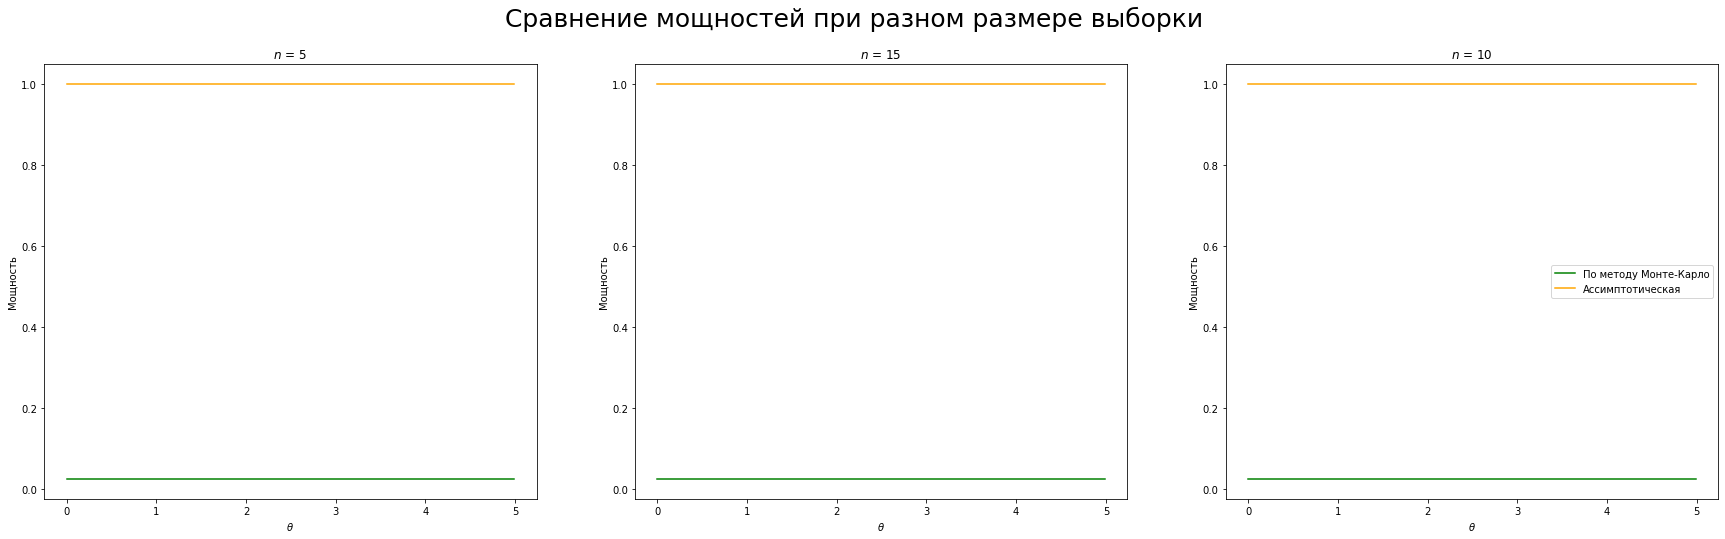

In [254]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
for i, n in enumerate(n_s):
    ax[i].plot(theta_grid, powers_monte_carl[i], c='g', label='По методу Монте-Карло')
    ax[i].plot(theta_grid, powers_asympt_mean[i], c='orange', label='Ассимптотическая')
    
    ax[i].set_title('$n$ = {}'.format(n))
    ax[i].set_xlabel('$\\theta$')
    ax[i].set_ylabel('Мощность')
plt.legend()
plt.suptitle('Сравнение мощностей при разном размере выборки', fontsize=25);

**Вывод:** *Я немного запуталась в подсчете мощностей, доделаю в дорешке*